#Kaggle 勉強用

## 手順(1) 「test.csv」、「train.csv」、「gender_submission.csv」をアップロード

In [ ]:
 # Colaboratoryでファイルをアップロード
 from google.colab import files
 uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
!ls -ltra

total 200
drwxr-xr-x 1 root root  4096 Aug  2 16:06  sample_data
drwxr-xr-x 1 root root  4096 Aug  7 16:05  .config
drwxr-xr-x 1 root root  4096 Aug 10 02:40  ..
-rw-r--r-- 1 root root 28629 Aug 10 02:53  test.csv
-rw-r--r-- 1 root root 61194 Aug 10 02:53  train.csv
-rw-r--r-- 1 root root  3258 Aug 10 04:16  gender_submission.csv
-rw-r--r-- 1 root root 28629 Aug 10 04:16 'test (1).csv'
-rw-r--r-- 1 root root 61194 Aug 10 04:16 'train (1).csv'
drwxr-xr-x 1 root root  4096 Aug 10 04:20  .
-rw-r--r-- 1 root root  2839 Aug 10 04:59  submit_190810.csv


##手順(2) テストコード

In [ ]:
import numpy as np
print(np.arange(11))
print(np.arange(11)+1)
print(np.arange(1,11))

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
import pandas as pd

# train data load(csvFileのPath気をつけてください)
train = pd.read_csv("train.csv", index_col = "PassengerId")

# 出力確認
print(train.shape)
# Macの場合 ctrl + Enterで実装 or Runボタンをクリック
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# test data load
test = pd.read_csv("test.csv", index_col = "PassengerId")

# 出力確認
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


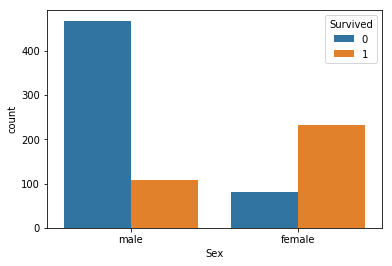

In [ ]:
#Seaborn宣言
import seaborn as sns

# Seabornのリンクを確認するといろんな視覚化の例があるので、
# 必要だと思うAPIを使う
sns.countplot(data=train, x="Sex", hue="Survived")

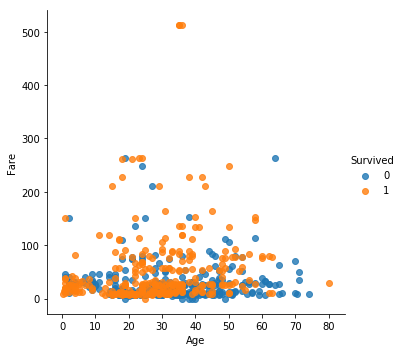

In [ ]:
#　年齢と料金の関連性を確認
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [ ]:
#200以上の生存率は少ないため、　100以下のデータで行う
#その後、sns.lmplotでまた確認する
low_fare = train[train["Fare"] < 100]
type(low_fare)

pandas.core.frame.DataFrame

In [ ]:
# Sex_encodeというカラムに性別を数字で格納
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [ ]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [ ]:
#両方確認したら、test.csvのみ空になっていた
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [ ]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [ ]:
#NaNに値を埋めるために、Fare_fillinカラムを作成
train["Fare_fillin"] = train["Fare"]

#test.csvにも適用する
test["Fare_fillin"] = test["Fare"]

In [ ]:
# FareがNaNになっている乗客を検索後、0を入れる
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0

# 0が入っているか確認
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


In [ ]:
#Age　２０歳以下を学生とする
train["Student"] = train["Age"] < 20
print(train.shape)
train[["Age", "Student"]].head(5)

(891, 14)


,Age,Student
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False


In [ ]:
#test.csvにも適用する
test["Student"] = test["Age"] < 20
print(test.shape)
test[["Age", "Student"]].head(5)

(418, 13)


,Age,Student
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False


In [ ]:
label_name = "Survived"
label_name
# feature_namesにFeatureとして使うカラムを格納
feature_names = [ "Sex_encode", "Fare_fillin", "Student"]
feature_names

['Sex_encode', 'Fare_fillin', 'Student']

In [ ]:
# feature_namesでtrainデータのfeatureを取得
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 3)


,Sex_encode,Fare_fillin,Student
PassengerId,,,
1,0.0,7.2500,False
2,1.0,71.2833,False
3,1.0,7.9250,False
4,1.0,53.1000,False
5,0.0,8.0500,False


In [ ]:
#test.csvにも適用する
X_test = test[feature_names]
# label_name을でtrainデータのlabelを取得
y_train = train[label_name]

In [ ]:
# scikit-learn(sklearn)の tree ModuleからDecisionTreeClassifierを取得
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8, random_state=0)
# DecisionTreeClassifierを学習
# fit という機能でtrainデータのfeature(X_train)とlabel(y_train)を入れる
model.fit(X_train, y_train)
# fitが終わったら、predictの機能でSurvivedを予測する
#　その後、testデータのSurvivedを返して、predictionsという変数に格納
predictions = model.predict(X_test)

In [ ]:
# Kaggleが提供している提出向けcsvを読み取る
# PassengerIdは testデータと一緒で, Survivedはmale(0), female(1)が入っている
submission = pd.read_csv("gender_submission.csv", index_col="PassengerId")
print(submission.shape)
submission.head(10)

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [ ]:
submission['Survived'] =  predictions

In [ ]:
# kaggleに提出するcsv作成
submission.to_csv("submit_190810.csv")

In [ ]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
